In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Bilinear layer embed visualization

In [2]:
# Define the embedding initialization
def initialize_embedding(num_prototypes, max_count):
    """Initialize embedding matrix for testing purposes"""
    expanded_dim = num_prototypes * max_count
    embed = nn.Linear(num_prototypes, expanded_dim, bias=False)
    
    # Initialize the embedding
    with torch.no_grad():
        # Zero out all weights first
        embed.weight.zero_()
        
        # Initialize the embedding so each prototype affects max_count consecutive dimensions
        for p in range(num_prototypes):
            for c in range(max_count):
                idx = p * max_count + c
                # Each output dimension corresponds to a specific count of a specific prototype
                embed.weight[idx, p] = c + 1  # Scale by count value
    
    return embed

In [3]:
# Test parameters
num_prototypes = 5
max_count = 3

In [4]:
# Create and initialize the embedding
embed = initialize_embedding(num_prototypes, max_count)

# Display the embedding weight matrix
print("Embedding weight matrix:")
print(embed.weight)

Embedding weight matrix:
Parameter containing:
tensor([[1., 0., 0., 0., 0.],
        [2., 0., 0., 0., 0.],
        [3., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 2., 0., 0., 0.],
        [0., 3., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 2., 0., 0.],
        [0., 0., 3., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 2., 0.],
        [0., 0., 0., 3., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 2.],
        [0., 0., 0., 0., 3.]], requires_grad=True)


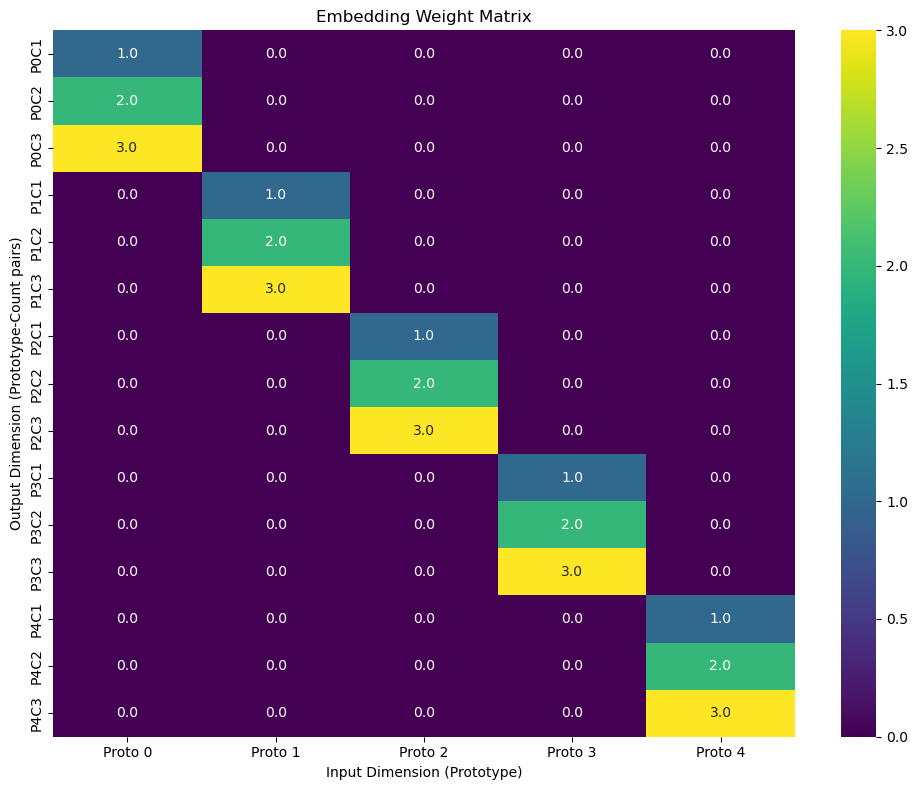

In [63]:
# Visualize with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(embed.weight.detach().numpy(), annot=True, fmt=".1f", cmap="viridis", 
            xticklabels=[f"Proto {i}" for i in range(num_prototypes)],
            yticklabels=[f"P{p}C{c+1}" for p in range(num_prototypes) for c in range(max_count)])
plt.title("Embedding Weight Matrix")
plt.ylabel("Output Dimension (Prototype-Count pairs)")
plt.xlabel("Input Dimension (Prototype)")
plt.tight_layout()
plt.show()

In [59]:
# Test with some example inputs
test_inputs = torch.zeros((4, num_prototypes))

test_inputs[0, 0] = 1
test_inputs[1, 2] = 2
test_inputs[2, 3] = 3

test_inputs[3, 0] = 1
test_inputs[3, 1] = 2
test_inputs[3, 2] = 3
test_inputs[3, -1] = 1


Testing with example inputs:

Input: tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Output: [1. 2. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


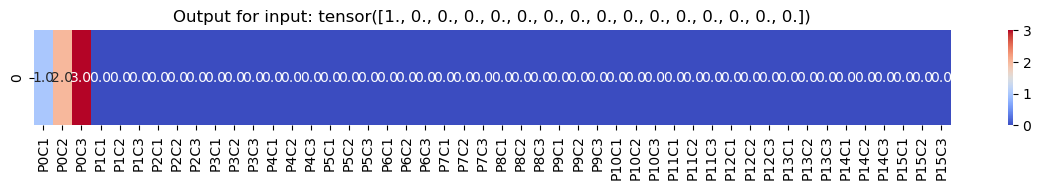


Input: tensor([0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Output: [0. 0. 0. 0. 0. 0. 2. 4. 6. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


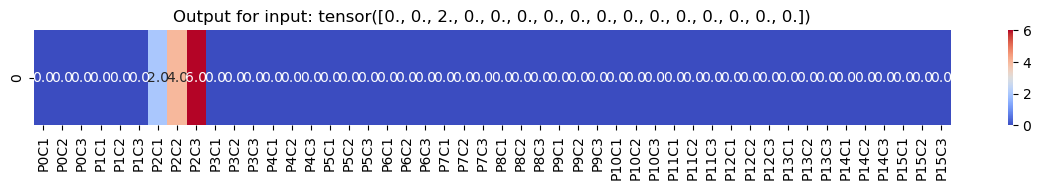


Input: tensor([0., 0., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Output: [0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 6. 9. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


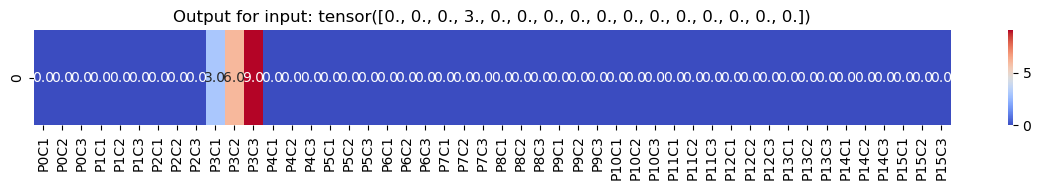


Input: tensor([1., 2., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])
Output: [1. 2. 3. 2. 4. 6. 3. 6. 9. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 3.]


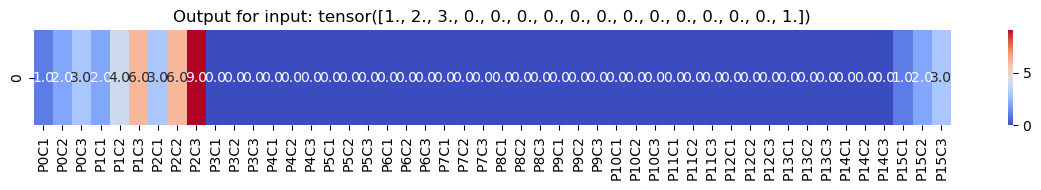

In [60]:
print("\nTesting with example inputs:")
for input_vals in test_inputs:
	input_tensor = input_vals.squeeze(0)
	output = embed(input_tensor)
	print(f"\nInput: {input_vals}")
	print(f"Output: {output.squeeze().detach().numpy()}")

	# Also visualize the output as a heatmap
	plt.figure(figsize=(12, 2))
	sns.heatmap([output.squeeze().detach().numpy()], annot=True, fmt=".1f", cmap="coolwarm",
                xticklabels=[f"P{p}C{c+1}" for p in range(num_prototypes) for c in range(max_count)])
	plt.title(f"Output for input: {input_vals}")
	plt.tight_layout()
	plt.show()

# Linear layer embed visualization

In [23]:
from count_pipnet_utils import LinearIntermediate

In [25]:
# Test parameters
num_prototypes = 4
max_count = 3

In [27]:
# Create the linear intermediate layer
linear_intermediate = LinearIntermediate(num_prototypes, max_count)

# Display the linear transformation weight
print("Linear transformation weight:")
print(linear_intermediate.linear.weight)

Linear transformation weight:
Parameter containing:
tensor([[0.3333],
        [0.6667],
        [1.0000]], requires_grad=True)



Testing with example inputs:

Input: [1, 0, 0, 0]
Output shape: torch.Size([1, 12])
Output reshaped by prototype:
[[0.33333334 0.         0.         0.        ]
 [0.6666667  0.         0.         0.        ]
 [1.         0.         0.         0.        ]]


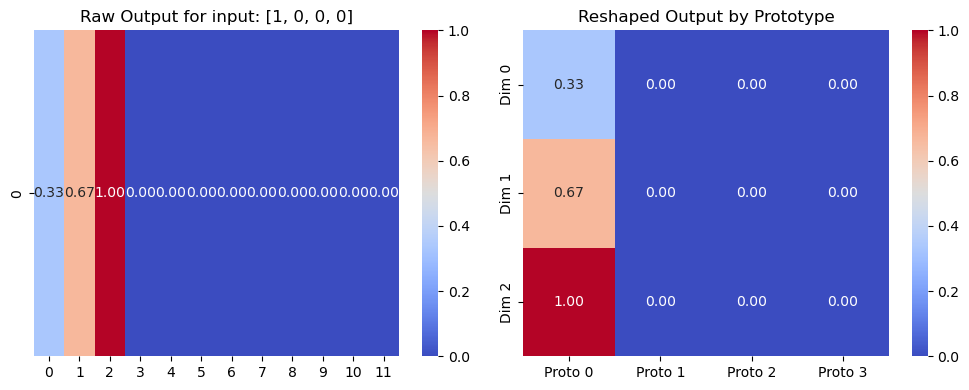


Input: [2, 0, 0, 0]
Output shape: torch.Size([1, 12])
Output reshaped by prototype:
[[0.6666667 0.        0.        0.       ]
 [1.3333334 0.        0.        0.       ]
 [2.        0.        0.        0.       ]]


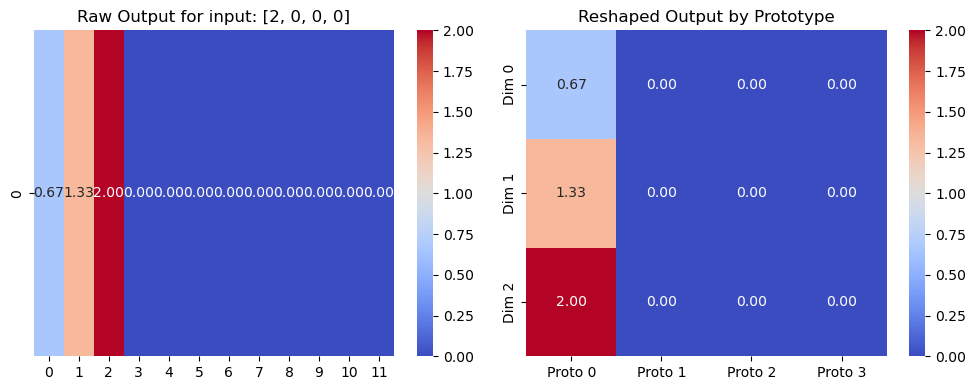


Input: [0, 3, 0, 1]
Output shape: torch.Size([1, 12])
Output reshaped by prototype:
[[0.         1.         0.         0.33333334]
 [0.         2.         0.         0.6666667 ]
 [0.         3.         0.         1.        ]]


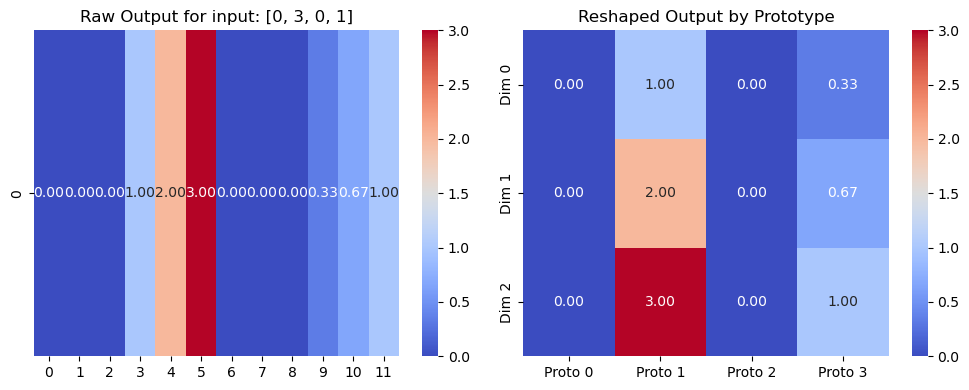


Input: [1, 2, 3, 0]
Output shape: torch.Size([1, 12])
Output reshaped by prototype:
[[0.33333334 0.6666667  1.         0.        ]
 [0.6666667  1.3333334  2.         0.        ]
 [1.         2.         3.         0.        ]]


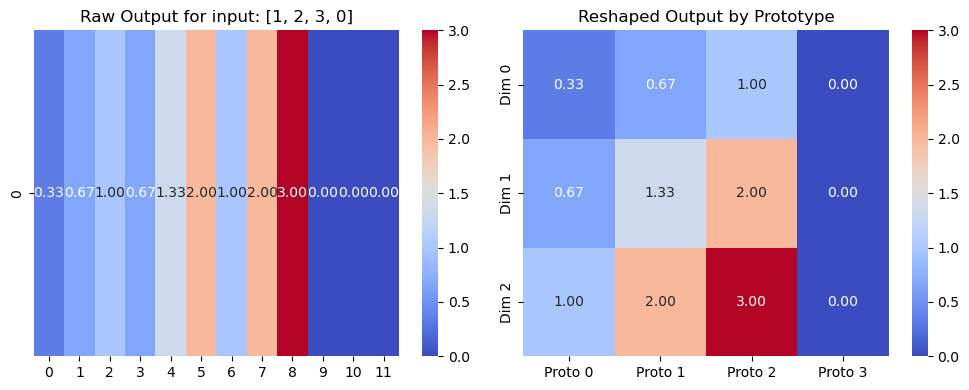

In [32]:
# Test with some example inputs
test_inputs = [
    [1, 0, 0, 0],  # 1 of prototype 0, 0 of others
    [2, 0, 0, 0],  # 2 of prototype 0, 0 of others
    [0, 3, 0, 1],  # 3 of prototype 1, 0 of others
    [1, 2, 3, 0],  # Mixed counts across prototypes
]

print("\nTesting with example inputs:")
for input_vals in test_inputs:
    input_tensor = torch.tensor([input_vals], dtype=torch.float32)
    output = linear_intermediate(input_tensor)
    
    print(f"\nInput: {input_vals}")
    print(f"Output shape: {output.shape}")
    
    # Reshape output for better visualization
    output_reshaped = output.reshape(num_prototypes, max_count).t()
    
    print("Output reshaped by prototype:")
    print(output_reshaped.detach().numpy())
    
    # Visualize the output as a heatmap
    plt.figure(figsize=(10, 4))
    
    # Plot raw output
    plt.subplot(1, 2, 1)
    sns.heatmap([output.squeeze().detach().numpy()], annot=True, fmt=".2f", cmap="coolwarm")
    plt.title(f"Raw Output for input: {input_vals}")
    
    # Plot reshaped output
    plt.subplot(1, 2, 2)
    sns.heatmap(output_reshaped.detach().numpy(), annot=True, fmt=".2f", cmap="coolwarm",
                xticklabels=[f"Proto {i}" for i in range(num_prototypes)],
                yticklabels=[f"Dim {i}" for i in range(max_count)])
    plt.title(f"Reshaped Output by Prototype")
    
    plt.tight_layout()
    plt.show()